<a href="https://colab.research.google.com/github/Kartikgc9/MiniProjects/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df1 = pd.read_csv("/content/business.csv" , sep = "," ,encoding = "utf-8")
df1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [4]:
df2 = pd.read_csv("/content/economy.csv" , sep = "," ,encoding = "utf-8")
df2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


In [5]:
df3 = pd.read_csv("/content/Clean_Dataset.csv" , sep = "," ,encoding = "utf-8")
df3

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [6]:
df3.drop(['Unnamed: 0'], axis=1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
df3.columns


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [9]:
df3.columns.to_list()

['Unnamed: 0',
 'airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [10]:
df3.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df3.head(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [12]:
df3.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [13]:
df3.sample(3)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
205440,205440,Vistara,UK-822,Chennai,Morning,two_or_more,Night,Hyderabad,Economy,11.17,35,6015
285073,285073,Vistara,UK-874,Hyderabad,Morning,one,Evening,Kolkata,Business,9.58,43,79461
90791,90791,AirAsia,I5-741,Bangalore,Morning,zero,Afternoon,Delhi,Economy,2.75,34,4498


In [14]:
df3.isnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df3.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [16]:
df3['price'].mean()

20889.660523133203

In [17]:
df3['price'].var()

515188643.4044351

In [18]:
df3['price'].std()

22697.76736607447

In [19]:
df3['price'].agg(["min", "max","mean", "var", "std"])

min     1.105000e+03
max     1.230710e+05
mean    2.088966e+04
var     5.151886e+08
std     2.269777e+04
Name: price, dtype: float64

In [20]:
df3.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [21]:
df3.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [22]:
df3['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [23]:
df3['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

DATA VISUALIZATION

<Axes: xlabel='price', ylabel='Density'>

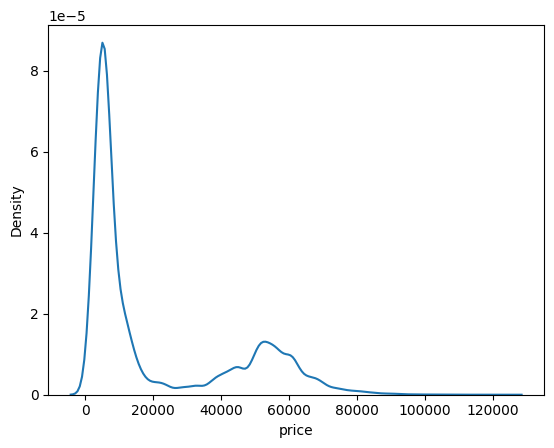

In [24]:
sns.kdeplot(data=df3, x="price")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Delhi')])

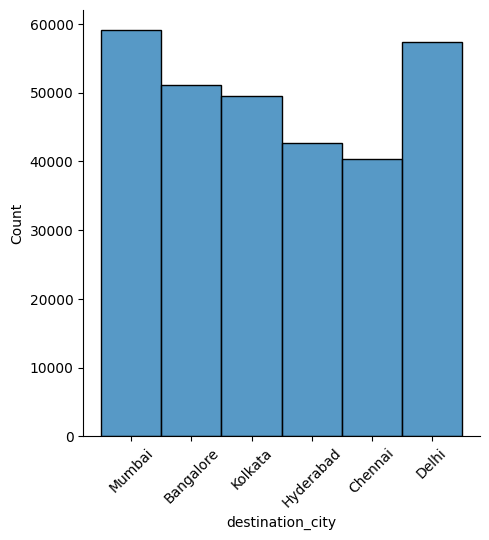

In [25]:
sns.displot(data=df3, x="destination_city") #displot commmand is used to display histogram.
plt.xticks(rotation=45)

In [26]:
airlineConverted = pd.get_dummies(df3['airline'])
airlineConverted

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


<Axes: xlabel='price', ylabel='Density'>

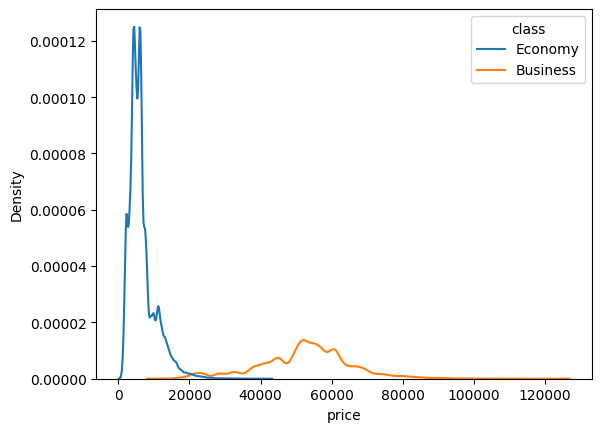

In [27]:
sns.kdeplot(data=df3, x = "price", hue="class")

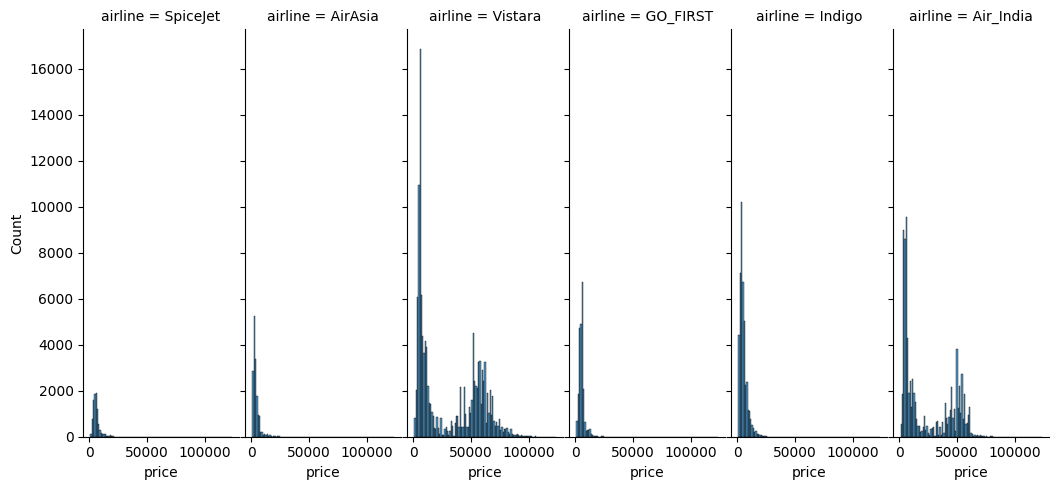

In [28]:
g = sns.displot(data=df3, x="price", col="airline")
g.figure.set_figwidth(20)
g.figure.set_figwidth(10)

In [29]:
df3['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [30]:
df3.groupby(['airline']).sum().sort_values("price" , ascending= False)

<ipython-input-30-e419120865a4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['airline']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,duration,days_left,price
airline,,,,
Vistara,22727613408,1703930.16,3310849,3886470735
Air_India,13180955596,1254168.60,2062541,1901529790
Indigo,4747640181,249888.88,1132517,229580207
GO_FIRST,2030668459,202888.42,635645,130973972
AirAsia,1530967642,143943.72,446481,65858089
SpiceJet,827916342,113356.28,217371,55681482


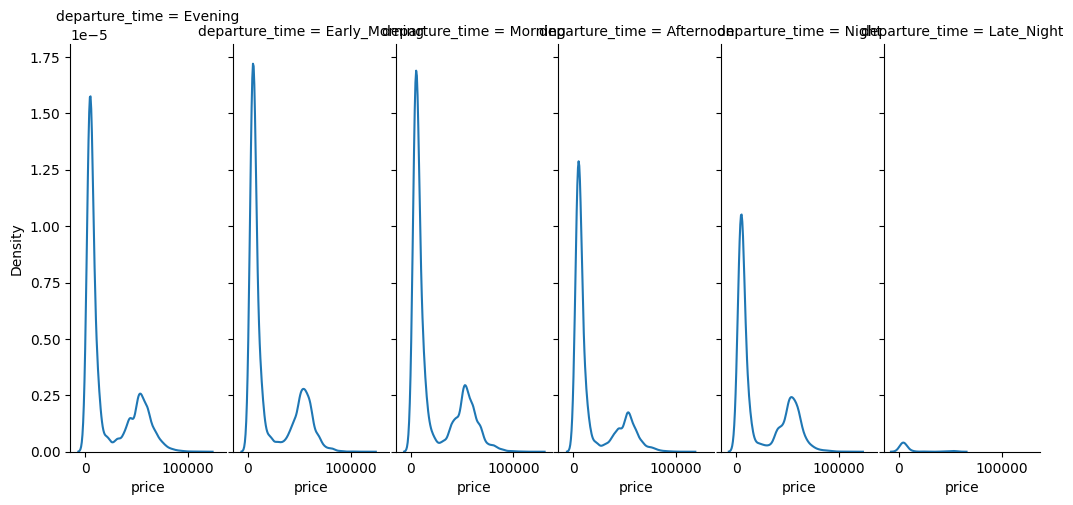

In [33]:
my_plot = sns.displot(data=df3, x="price", col="departure_time" , kind = "kde")
my_plot.figure.set_figwidth(20)
my_plot.figure.set_figwidth(10)
# my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

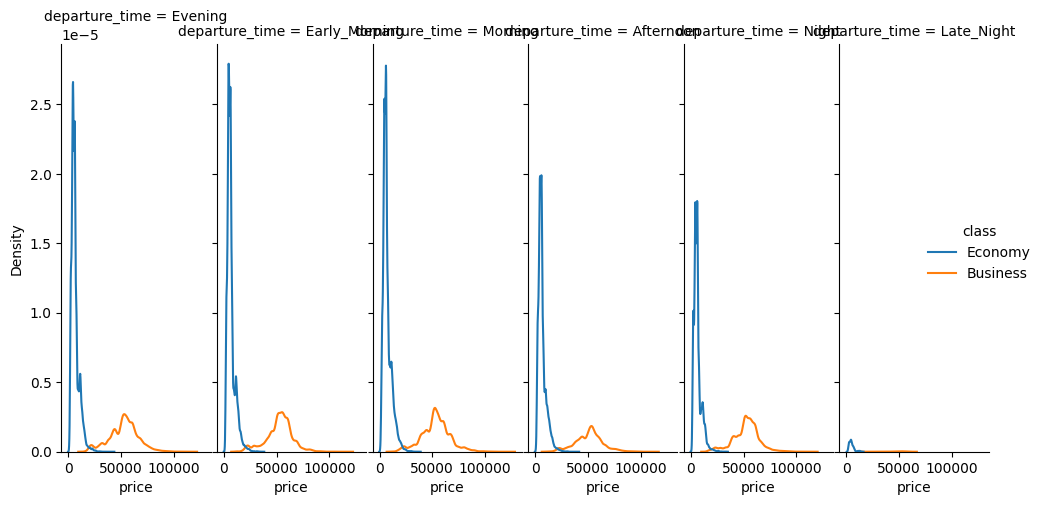

In [34]:
 g = sns.displot(data=df3, x="price", hue = "class",col="departure_time" , kind = "kde")
 g.figure.set_figwidth(20)
 g.figure.set_figwidth(10)

In [35]:
df3['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

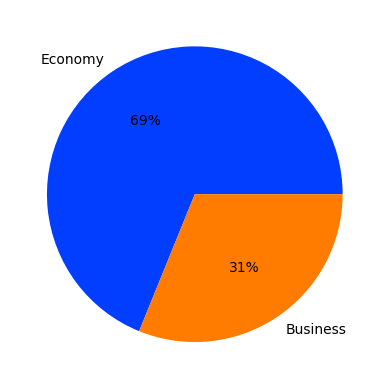

In [36]:
##pie chart
# declaring the data
data = [206666, 93487]
keys = ['Economy', 'Business']
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()

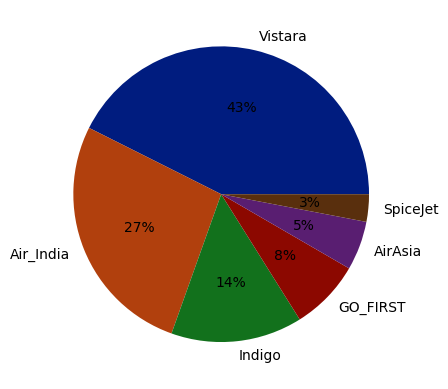

In [37]:
# declaring the data
data = [127859, 80892, 43120,23173,16098,9011 ]
keys = ['Vistara', 'Air_India', 'Indigo', 'GO_FIRST','AirAsia','SpiceJet']
# define Seaborn color palette to use
palette_color = sns.color_palette('dark')
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
# displaying chart
plt.show()

In [38]:
df3.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [39]:
df3.groupby(['source_city']).sum()

<ipython-input-39-912f6fd2e97d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['source_city']).sum()


,Unnamed: 0,duration,days_left,price
source_city,,,,
Bangalore,7789329150,626252.34,1351264,1117721587
Chennai,8748304932,496865.48,1009905,851219653
Delhi,4878663077,706395.23,1593088,1162531230
Hyderabad,8270980299,500611.07,1076240,822470388
Kolkata,8085851232,614093.03,1205632,1007872785
Mumbai,7272632938,723958.91,1569275,1308278632


In [40]:
df3.groupby(['arrival_time']).sum().sort_values("price" , ascending= False)

<ipython-input-40-089a704b823c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['arrival_time']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,duration,days_left,price
arrival_time,,,,
Night,13894175151,1054626.41,2371815,1976008685
Evening,12186458603,988559.89,2012215,1804904318
Morning,9672324809,874564.04,1625419,1394666559
Afternoon,5514835315,434536.32,990048,705365511
Early_Morning,2031991340,193629.01,419068,231149232
Late_Night,1745976410,122260.39,386839,157999970


In [41]:
df3.groupby(['duration']).sum().sort_values("price" , ascending= False)[["price"]]

<ipython-input-41-18b0fa3bf733>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['duration']).sum().sort_values("price" , ascending= False)[["price"]]


,price
duration,
12.42,56432944
12.00,55158074
12.08,52424761
11.17,49654390
13.00,47214801
...,...
37.17,13403
39.25,13107
40.75,11522


In [42]:
df3.groupby(['duration']).sum().sort_values("price" , ascending= False)[["price"]].head(2)

<ipython-input-42-323416965ab9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['duration']).sum().sort_values("price" , ascending= False)[["price"]].head(2)


,price
duration,
12.42,56432944
12.00,55158074


In [43]:
df3.groupby(['departure_time' , "arrival_time",'stops']).sum()[["price"]]

<ipython-input-43-35bede8badb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['departure_time' , "arrival_time",'stops']).sum()[["price"]]


price
departure_time arrival_time  stops                 
Afternoon      Afternoon     one           41391737
                             two_or_more     932799
                             zero          14033159
               Early_Morning one           25094536
                             two_or_more     889344
...                                             ...
Night          Morning       one          409338352
                             two_or_more    1783519
               Night         one          125286660
                             two_or_more    1294800
                             zero          47179247

[78 rows x 1 columns]

In [44]:
df3.groupby(['departure_time' , "arrival_time",'stops']).sum().sort_values("price" , ascending= False)[["price"]]

<ipython-input-44-5bdff458f8f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['departure_time' , "arrival_time",'stops']).sum().sort_values("price" , ascending= False)[["price"]]


price
departure_time arrival_time  stops                 
Morning        Night         one          611841714
               Evening       one          511086865
Evening        Morning       one          477163859
Early_Morning  Night         one          457433388
               Evening       one          429758211
...                                             ...
Night          Afternoon     two_or_more     435896
               Early_Morning two_or_more     325188
Early_Morning  Late_Night    two_or_more     308180
Late_Night     Morning       two_or_more     225787
Night          Late_Night    two_or_more      28294

[78 rows x 1 columns]

In [45]:
df3[:10]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [46]:
df3[2:6]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955


In [47]:
df3[2000:2020]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2000,2000,Vistara,UK-673,Delhi,Afternoon,one,Evening,Mumbai,Economy,5.00,12,11100
2001,2001,GO_FIRST,G8-2401,Delhi,Morning,one,Evening,Mumbai,Economy,8.00,12,11179
2002,2002,GO_FIRST,G8-2403,Delhi,Morning,one,Evening,Mumbai,Economy,8.00,12,11179
2003,2003,GO_FIRST,G8-357,Delhi,Early_Morning,two_or_more,Evening,Mumbai,Economy,12.08,12,11295
2004,2004,Air_India,AI-411,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,8.00,12,11310
2005,2005,GO_FIRST,G8-209,Delhi,Early_Morning,two_or_more,Evening,Mumbai,Economy,10.58,12,11311
2006,2006,Air_India,AI-409,Delhi,Morning,one,Evening,Mumbai,Economy,7.25,12,11341
2007,2007,Air_India,AI-403,Delhi,Afternoon,one,Evening,Mumbai,Economy,6.33,12,11353
2008,2008,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Economy,6.67,12,11415
2009,2009,Air_India,AI-542,Delhi,Morning,one,Night,Mumbai,Economy,14.17,12,11415


In [48]:
df3[7000:]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
7000,7000,Air_India,AI-406,Delhi,Morning,one,Afternoon,Mumbai,Economy,5.42,35,7005
7001,7001,GO_FIRST,G8-7541,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,6.08,35,7158
7002,7002,Air_India,AI-415,Delhi,Evening,one,Evening,Mumbai,Economy,25.08,35,7187
7003,7003,Vistara,UK-705,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,5.50,35,7575
7004,7004,Vistara,UK-707,Delhi,Evening,one,Night,Mumbai,Economy,6.00,35,7575
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [49]:
df3.iloc[300:310 , :2]

,Unnamed: 0,airline
300,300,Vistara
301,301,Indigo
302,302,Indigo
303,303,Air_India
304,304,Vistara
305,305,Vistara
306,306,SpiceJet
307,307,Indigo
308,308,Indigo
309,309,Air_India


In [50]:
df3.iloc[7000: , 9:]

,duration,days_left,price
7000,5.42,35,7005
7001,6.08,35,7158
7002,25.08,35,7187
7003,5.50,35,7575
7004,6.00,35,7575
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [51]:
df3.iloc[400:420 , [1,3,6,7,-1]]

,airline,source_city,arrival_time,destination_city,price
400,SpiceJet,Delhi,Morning,Mumbai,5953
401,SpiceJet,Delhi,Morning,Mumbai,5953
402,SpiceJet,Delhi,Night,Mumbai,5953
403,SpiceJet,Delhi,Night,Mumbai,5953
404,Vistara,Delhi,Evening,Mumbai,5955
405,Vistara,Delhi,Evening,Mumbai,5955
406,Vistara,Delhi,Night,Mumbai,5955
407,Vistara,Delhi,Afternoon,Mumbai,5955
408,Vistara,Delhi,Night,Mumbai,5955
409,Vistara,Delhi,Afternoon,Mumbai,5955


In [52]:
df3.loc[: , ['airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time' ] ]

,airline,flight,source_city,departure_time,stops,arrival_time
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon
4,Vistara,UK-963,Delhi,Morning,zero,Morning
...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening
300149,Vistara,UK-826,Chennai,Afternoon,one,Night
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening


In [54]:
delhiDes=df3[df3['source_city'] == "Delhi"]
delhiDes

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
224977,224977,Vistara,UK-955,Delhi,Evening,one,Morning,Chennai,Business,15.08,49,68184
224978,224978,Air_India,AI-883,Delhi,Night,two_or_more,Morning,Chennai,Business,12.92,49,70323
224979,224979,Vistara,UK-829,Delhi,Early_Morning,two_or_more,Evening,Chennai,Business,12.83,49,71376
224980,224980,Vistara,UK-819,Delhi,Afternoon,two_or_more,Night,Chennai,Business,8.83,49,76684


In [55]:
delhiDes.describe()

,Unnamed: 0,duration,days_left,price
count,61343.000000,61343.000000,61343.000000,61343.000000
mean,79530.884975,11.515499,25.970168,18951.326639
std,89577.339431,7.336256,13.633365,20920.410359
min,0.000000,1.920000,1.000000,1998.000000
25%,15335.500000,5.750000,14.000000,4496.000000
50%,30671.000000,10.250000,26.000000,6840.000000
75%,209645.500000,15.580000,38.000000,35490.000000
max,224981.000000,39.670000,49.000000,117307.000000


In [56]:
df3[(df3['source_city'] == "Delhi") & (df3['price'] > 5000)]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
224977,224977,Vistara,UK-955,Delhi,Evening,one,Morning,Chennai,Business,15.08,49,68184
224978,224978,Air_India,AI-883,Delhi,Night,two_or_more,Morning,Chennai,Business,12.92,49,70323
224979,224979,Vistara,UK-829,Delhi,Early_Morning,two_or_more,Evening,Chennai,Business,12.83,49,71376
224980,224980,Vistara,UK-819,Delhi,Afternoon,two_or_more,Night,Chennai,Business,8.83,49,76684


In [57]:
df3.groupby(["airline"]).sum()[["price"]]

<ipython-input-57-bd39b5a80522>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(["airline"]).sum()[["price"]]


,price
airline,
AirAsia,65858089
Air_India,1901529790
GO_FIRST,130973972
Indigo,229580207
SpiceJet,55681482
Vistara,3886470735


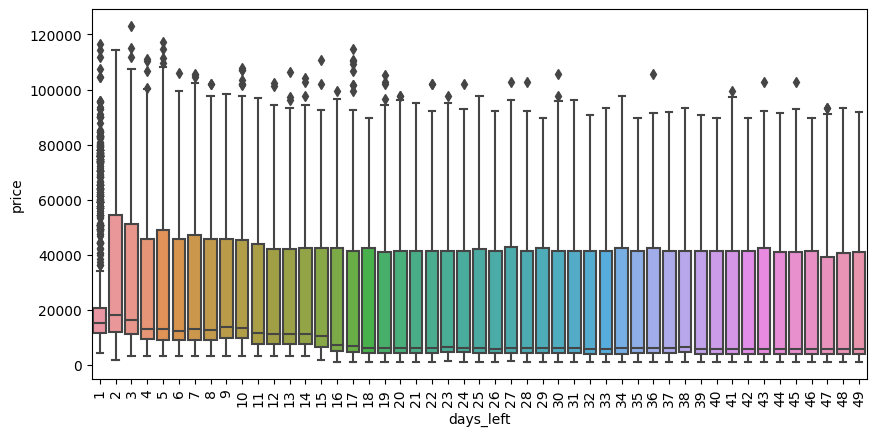

In [58]:
g = sns.boxplot(data=df3, x="days_left", y="price")
plt.xticks(rotation=90)
g.figure.set_figwidth(20)
g.figure.set_figwidth(10)

In [59]:
df3[(df3['days_left'] < 3)].sort_values("price" , ascending= False)[["price"]]

,price
215859,116562
230092,114523
219183,114507
215858,114434
241548,111964
...,...
115602,3498
115601,3497
193851,3362
193850,3361


In [60]:
df3.groupby(['departure_time' , "arrival_time"]).sum().sort_values("price" , ascending= False)[["price"]]

<ipython-input-60-d18d9e251750>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby(['departure_time' , "arrival_time"]).sum().sort_values("price" , ascending= False)[["price"]]


price
departure_time arrival_time            
Morning        Night          635284614
               Evening        525529676
Evening        Morning        495652136
Early_Morning  Night          468408653
               Evening        467953725
Night          Morning        411121871
Afternoon      Night          399430461
Evening        Evening        320036957
               Night          296003630
Night          Evening        289400415
Early_Morning  Afternoon      205982431
Afternoon      Evening        199989137
Night          Night          173760707
Morning        Morning        166870955
Early_Morning  Morning        164116749
Night          Afternoon      162422447
Afternoon      Morning        154098620
Morning        Afternoon      140995710
Evening        Afternoon      138255218
               Early_Morning   84081850
Afternoon      Afternoon       56357695
Night          Early_Morning   50996042
Evening        Late_Night      48239433
Morning        Early_Morning   37423051
Afternoon      Late_Night      32997051
Morning        Late_Night      32838063
Early_Morning  Early_Morning   30385510
Afternoon      Early_Morning   25983880
Early_Morning  Late_Night      23710430
Night          Late_Night      19627497
Late_Night     Night            3120620
               Morning          2806228
               Early_Morning    2278899
               Evening          1994408
               Afternoon        1352010
               Late_Night        587496

<Axes: xlabel='price', ylabel='Density'>

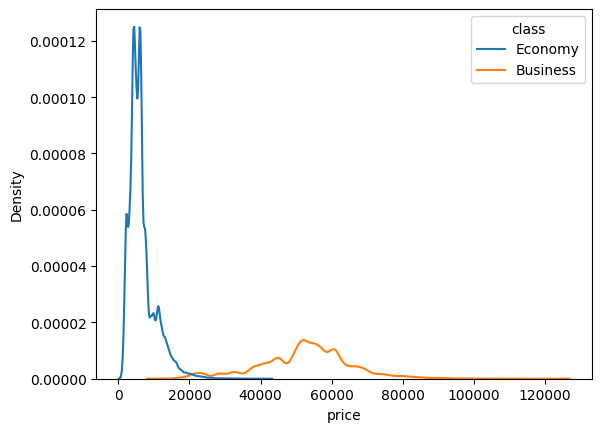

In [61]:
sns.kdeplot(data=df3, x = "price", hue="class")

In [62]:
df3['destination_city'].max()

'Mumbai'

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Delhi')])

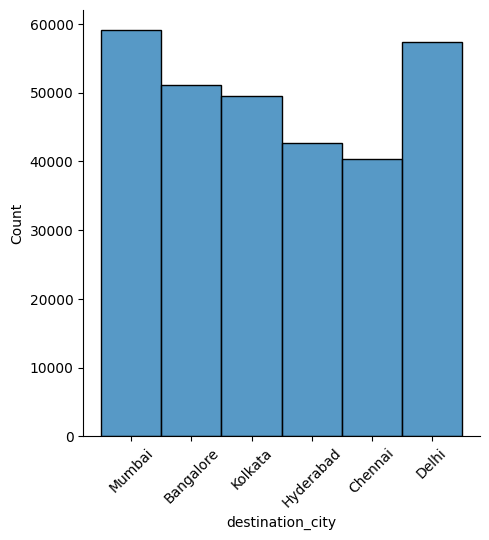

In [63]:
sns.displot(data=df3, x="destination_city")
plt.xticks(rotation=45)

In [64]:
df3.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [65]:
df3['class'].value_counts()/df3.shape[0]*100

Economy     68.853551
Business    31.146449
Name: class, dtype: float64

In [66]:
df3.corr()

<ipython-input-66-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


<ipython-input-67-b14794a0d127>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr() , annot = True , cmap = "Greens")


<Axes: >

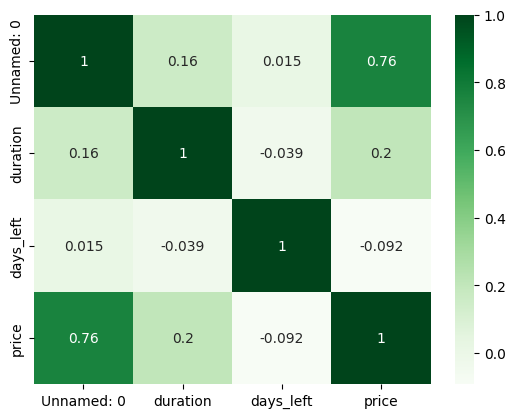

In [67]:
sns.heatmap(df3.corr() , annot = True , cmap = "Greens")

In [68]:
# List of airlines
df3['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [69]:
#Ratio of airlines
df3['airline'].value_counts()/df3['airline'].shape[0]*100

Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: airline, dtype: float64

Text(0.5, 1.0, 'Airlines vs prices')

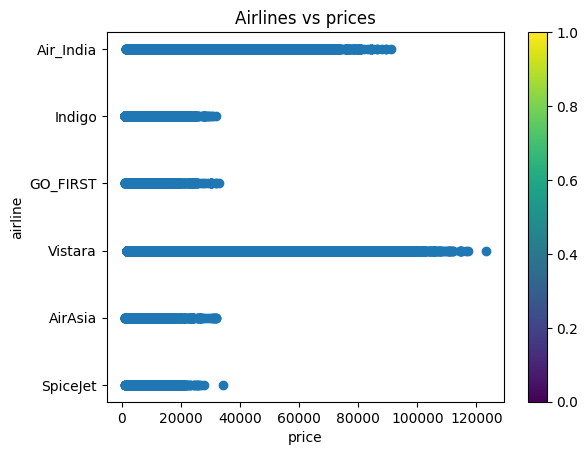

In [70]:
plt.scatter(df3['price'], df3['airline'])
plt.colorbar()
plt.xlabel("price")
plt.ylabel("airline")
plt.title("Airlines vs prices")

In [71]:
def discount(row):
    if row['days_left'] <= 4:
        return("50% discount")
    elif row['days_left'] > 4 and row['days_left'] <= 7:
        return("40% discount")
    elif row['days_left'] > 7 and row['days_left'] <= 14:
        return("30% discount")
    elif row['days_left'] > 14 and row['days_left'] <= 20:
        return("20% discount")
    else :
        return "No_discount"

In [72]:
df3['discount'] = df3.apply(discount , axis = 1)
df3

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,discount
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,50% discount
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,50% discount
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,50% discount
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,50% discount
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,50% discount
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,No_discount
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,No_discount
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,No_discount
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,No_discount
